<h1>Implementing Linear Regression on Boston Home Price Dataset</h1>

In [67]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
boston=load_boston()

In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
import pandas as pd
bos=pd.DataFrame(boston.data)
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['Price']=boston.target
print(bos.head())


         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  Price  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


In [68]:
X=bos.drop("Price",axis=1)
Y=bos['Price']
X = StandardScaler().fit_transform(X)


<h2>Implementing Linear Regression using sklearn on Boston Home Price Dataset</h2>

In [69]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.33,random_state=10)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(339, 13)
(339,)
(167, 13)
(167,)


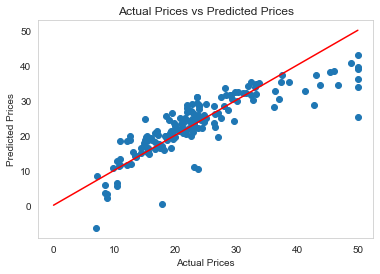

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
lm=LinearRegression()
lm.fit(X_train,Y_train)
y_pred=lm.predict(X_test)

plt.scatter(Y_test,y_pred)
plt.plot([0,50],[0,50], 'r-')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.grid()
plt.show()


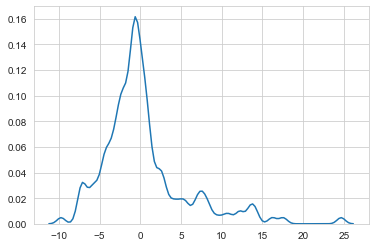

In [79]:
delta_y=Y_test-y_pred
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),bw=0.5)
plt.show()


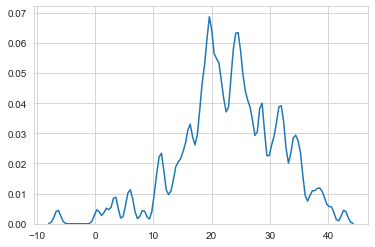

In [72]:
sns.kdeplot(np.array(y_pred),bw=0.5)
plt.show()

In [73]:
print(mean_squared_error(Y_test,y_pred))

27.10099170996249


<h2>Implementing SGD on Linear Regression using Boston Home Price Dataset</h2>

In [15]:
boston=load_boston()
print(boston.data.shape)


(506, 13)


In [40]:
bos=pd.DataFrame(boston.data)
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [44]:
bos["Price"]=boston.target

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(bos, bos["Price"], test_size = 0.33)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((339, 14), (167, 14), (339,), (167,))

In [47]:
m = X_train.shape[0]

In [48]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
columnNames = boston.feature_names

weight = np.random.randn(13)*np.sqrt(2/m)   # defining initial random weight from normal distribution
b = np.random.randn(1)*np.sqrt(2/m)   # generating initial random y-intercept from normal distribution

learningRate = 0.2

for i in range(2500):    # running 2500 iterations
    Data_batch_10 = X_train.sample(n = 10)   # taking 10 stochastic samples
    X_temp = Data_batch_10.drop("Price", axis = 1, inplace = False)
    X_std = StandardScaler().fit_transform(X_temp)
    X = pd.DataFrame(X_std, columns = columnNames)
    Y = Data_batch_10["Price"]
    PartialGradient = np.empty(13)
    sum2 = 0
    
    for j in range(13):     # as there are 13 dimensions in our dataset and dimensions of weight should also be same as dimension of our dataset
        sum1 = 0
        for k in range(10):
            sum1 += -2 * X.iloc[k][j] * (Y.iloc[k] - np.dot(weight, X.iloc[k]) - b)  # this is a derivative of linear regression w.r.t 'w
        PartialGradient[j] = sum1
    PartialGradient *= learningRate
#     print("Partial Gradient = "+str(PartialGradient))
#     print("Iteration number = "+str(i))
        
    for m in range(10):
        sum2 += -2 * (Y.iloc[m]- np.dot(weight, X.iloc[m]) - b)     # this is the derivative of linear regression w.r.t 'b'
    b = b - learningRate * sum2       #updating y-intercept 'b'
    

    for l in range(13):
        weight[l] -= PartialGradient[l]  # updating weights
        
    learningRate = 0.01 / pow(i+1, 0.25)     #learning rate at every iteration
    
    weight = weight + 0.0001*np.dot(weight, weight)   #adding l2 regularization
    b = b + 0.0001*np.dot(weight, weight) #adding L2 regularization

print("Weight = "+str(weight))
print("b = "+str(b))

Weight = [-0.71345055  0.35648737  0.08847358  1.41798163 -0.82266381  3.59453083
  0.24460396 -1.51567412  1.86502488 -1.55858079 -1.60827067  0.52070857
 -3.84947135]
b = [22.50444467]


In [50]:
import math
test_temp = X_test.drop("Price", axis = 1, inplace = False)
test_std = StandardScaler().fit_transform(test_temp)
test_data = pd.DataFrame(test_std, columns = columnNames)
test_labels = Y_test
y_predicted = []

for i in range(102):
    test_i = 0
    test_i = np.dot(weight, test_data.iloc[i]) + b[0]  #making prediction by using min values of weight obtained from SGD
    y_predicted.append(test_i)
    
y_true = []
for i in range(102):
    y_true.append(test_labels.iloc[i])

In [51]:
Mean_Sq_Error = mean_squared_error(y_true, y_predicted)
print(Mean_Sq_Error)

19.02191767438913


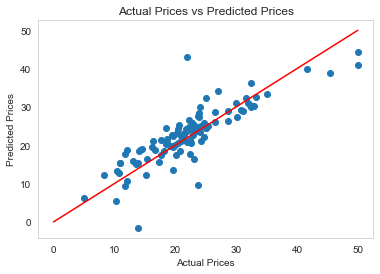

In [53]:
plt.scatter(y_true,y_predicted)
plt.plot([0,50],[0,50], 'r-')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.grid()
plt.show()

In [64]:
delta_y= []
for i in range(len(y_true)):
    delta_y.append(y_true[i]-y_predicted[i])


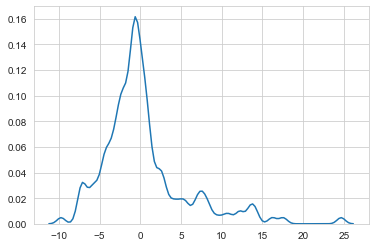

In [80]:
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),bw=0.5)
plt.show()

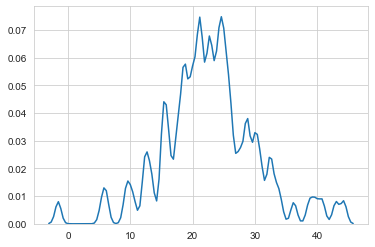

In [81]:
sns.kdeplot(np.array(y_predicted),bw=0.5)
plt.show()

In [77]:
print(mean_squared_error(y_true,y_predicted))

19.02191767438913


<h2>Final Verdict</h2>
<h4><u>Mean Square Error</u></h4><br>
<b>Manual Implementation(SGD):</b> 19.02<br>
<b>Sklearn Implementation:</b> 27.10